In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math, numpy 

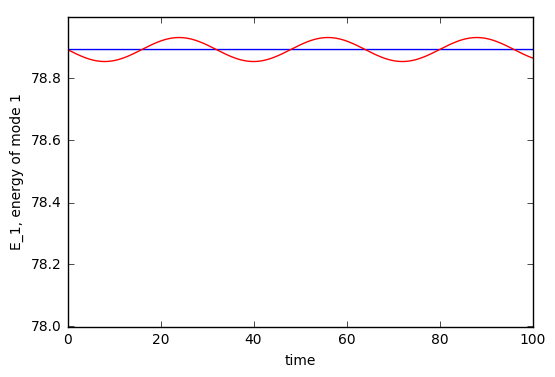

In [15]:
import pylab,math,numpy
Ntime = 10000
L = 32
dt = 0.01
def HARMONIC(u,n):
 return u[n+1]+u[n-1]-2.*u[n]
def FT(e,k):
 return sum([e[n]*math.sin(n*k*math.pi/L) for n in range(1,L)])/math.sqrt(L/2.)
#initial condition for the position u and velocity v
u = [0]+[L*math.sin(n*math.pi/L) for n in range(1,L)]+[0]
v = [0. for n in range(L+1)]
mode1 = []
#dynamics with fixed boundary conditions: u[0] = u[L-1] = 0
for itime in range(Ntime):
 oldu = u[:]
 oldv = v[:]
 v = [0]+[oldv[n]+dt*HARMONIC(oldu,n) for n in range(1,L)]+[0]
 u = [0]+[oldu[n]+dt*v[n] for n in range(1,L)]+[0]
 k = 1; en1 = FT(v,k)**2/2.+2.*(math.sin(k*math.pi/(2*L)))**2*FT(u,k)**2
 #k = 2; en2 = FT(v,k)**2/2.+2.*(math.sin(k*math.pi/(2*L)))**2*FT(u,k)**2
 mode1.append(en1)
pylab.xlabel('time')
pylab.ylabel('E_1, energy of mode 1')
time = [dt*itime for itime in range(Ntime)]
exact = [L*(L*math.sin(math.pi/(2*L)))**2 for itime in range(Ntime)]
pylab.plot(time,exact,'b-')
pylab.plot(time,mode1,'r-')
pylab.axis([0,Ntime*dt,78,79])
pylab.show()

[0, 1]